<a href="https://colab.research.google.com/github/ranlyn/Fruit-and-Vegetable-Recognition-Using-Convolutional-Neural-Networks/blob/main/Training_fruit_vegetable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing dataset




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Data preprocessing

###Training image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
'/content/drive/MyDrive/Fruit and vegetables dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 3123 files belonging to 36 classes.


###validation image processing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit and vegetables dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 351 files belonging to 36 classes.


In [ ]:
cnn=tf.keras.models.Sequential()

##Building convolution layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=36))

In [ ]:
#output layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and training phase

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 555s 5s/step - loss: 6.2610 - accuracy: 0.0349 - val_loss: 3.5562 - val_accuracy: 0.0427
Epoch 2/32
98/98 [==============================] - 141s 1s/step - loss: 3.5627 - accuracy: 0.0419 - val_loss: 3.4301 - val_accuracy: 0.0969
Epoch 3/32
98/98 [==============================] - 131s 1s/step - loss: 3.4115 - accuracy: 0.0826 - val_loss: 3.0066 - val_accuracy: 0.1624
Epoch 4/32
98/98 [==============================] - 136s 1s/step - loss: 3.1893 - accuracy: 0.1223 - val_loss: 2.9864 - val_accuracy: 0.2991
Epoch 5/32
98/98 [==============================] - 142s 1s/step - loss: 3.0028 - accuracy: 0.1784 - val_loss: 2.3539 - val_accuracy: 0.4416
Epoch 6/32
98/98 [==============================] - 141s 1s/step - loss: 2.7558 - accuracy: 0.2280 - val_loss: 2.1438 - val_accuracy: 0.5214
Epoch 7/32
98/98 [==============================] - 132s 1s/step - loss: 2.5750 - accuracy: 0.2799 - val_loss: 1.5896 - val_accuracy: 0.6638
Epoch 8/32
98

##Evaluating model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 87s 821ms/step - loss: 0.1125 - accuracy: 0.9721
Training accuracy: 0.9721421599388123


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

##Saving the model

In [ ]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_history.history #returns dictionary of history

In [ ]:
#Recording history in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#Calculating accuracy of model achieved on validation set

In [ ]:
print("validation set accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

validation set accuracy: 93.73219609260559 %


#Accuracy visualization

##Training visualization

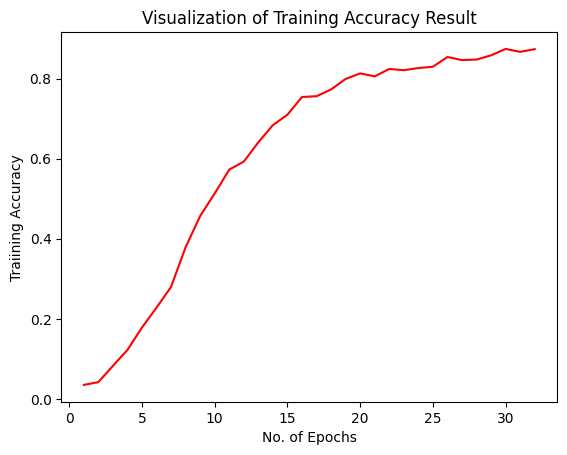

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()


##validation accuracy

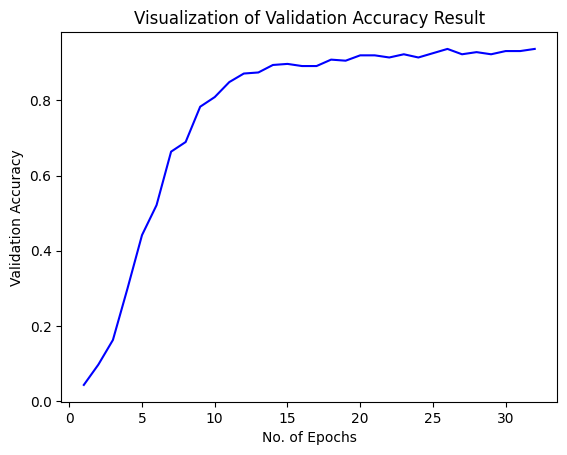

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()